### 목표
- 타이타닉 데이터 이용해서 생존자/사망자 예측해보자
- 머신러닝 전체 과정을 학습해보자

#### 머신러닝 과정
- 문제정의
- 데이터 수집: db, 크롤링...
- 데이터 전처리
- 탐색적 데이터 분석: 데이터끼리 상관관계, 최빈값, 최댓값, 평균값, 최솟값....
- 모델 선택(하이퍼파라미터 조정) 및 학습
- 모델 평가

### 1. 문제정의
- 생존자/사망자 예측
- kaggle사이트에 올려 점수를 확인해보자(높은 점수를 차지해보자)
- 머신러닝 전체 과정 학습

### 2.데이터 수집

- kaggle사이트에서 수집했다!

#### train, test변수에 각각의 파일 로드해주세요!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   #데이터 시각화를 위한 라이브러리(matplotlib보다 빠르고 간단, 좀 더 다양한 색상)

In [2]:
#PassengerId로 인덱스로 설정
train = pd.read_csv('Data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('Data/test.csv', index_col = 'PassengerId')

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape: 데이터의 크기 확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


### 3.데이터 전처리 및 데이터 탐색

In [5]:
# 결측치 있는 컬럼 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


train 결측치가 있는 특성(=column) : Age, Cabin, Embarked

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


test 결측치가 있는 특성: Age, Fare, Cabin

#### Embarked(승선항) 결측치 채우기
- S C Q 중에서 빈도값이 가장 높은 값으로 결측치를 채워보자

In [8]:
# Value_counts()  >> series(1차원데이터)에만 적용됨
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train['Embarked'] = train['Embarked'].fillna('S') #결측치 채워주고, 다시 초기화 시켜줘야 함  (안그러면 값이 둥둥 뜸)
# train 결측치 채워줬으면 test도 해줘야하지만, 타이타닉은 test의 Embarked 값에 결측치 없으므로 여기서는 적용X
# 'S'가 정답은 아니지만 여기서는 다른 정보가 없기에 가장 많은 수를 갖은 'S'로 채워줌 (단순 기술 통계치)

In [10]:
train.info()
#cf. pandas의 object --> 문자타입

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Age 결측치 채우기
- 단순 기술 통계치로 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보자
- Age와 다른 컬럼의 상관관계를 확인해보자

In [11]:
# corr() 상관관계 확인
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Age 컬럼과 상관관계가 가장 높은 컬럼은 Pclass
- 여자, 남자의 평균 나이값이 다를 수 있으므로 Sex컬럼과 그룹핑을 통해 결측치를 채워보자

In [12]:
pt = train.pivot_table(values = 'Age',
                      index = 'Pclass',
                      columns = 'Sex',
                      aggfunc = 'mean')
pt

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [13]:
# Pclass가 1이고, Sex가 'female'인 값 인덱싱
# loc이용(문자열 이름가지고 인덱싱. 행,열 둘다 넣어줄 수 있음)
pt.loc[1,'female']

34.61176470588235

In [14]:
# Pclass가 3이고, Sex가 'male'인 값 인덱싱
# loc이용
pt.loc[3, 'male']

26.507588932806325

In [15]:
def fill_age(row):
    #만약 나이에 결측치가 있는 행이라면 피벗테이블 값을 넣어 줌
    if np.isnan(row['Age']):
        return pt.loc[row['Pclass'], row['Sex']]  #pt.loc[3, 'male'] 이런식으로 반환해줌
    #결측치가 없다면 train데이터의 Age값을 그대로 넣어 줌
    else:
        return row['Age']

In [16]:
train['Age'] = train.apply(fill_age, axis = 1).astype('int64') #뒤의 소수점값 필요없으므로 astype은 int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [19]:
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Fare 결측치 채우기
- Fare와 상관관계가 높은 컬럼확인 -> Pclass
- Pclass와 Sex를 이용해서 결측치 채우기

In [21]:
# corr
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [22]:
# 피벗테이블 구성하여 요금 평균값 확인
#인덱스 Pclass 기준, 컬럼은 Sex 기준, 값은 Fare 평균값

pt2 = train.pivot_table(values = 'Fare',
                      index = 'Pclass',
                      columns = 'Sex',
                      aggfunc = 'mean')
pt2

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


In [23]:
test['Fare']  #소수점4자리까지

PassengerId
892       7.8292
893       7.0000
894       9.6875
895       8.6625
896      12.2875
          ...   
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 418, dtype: float64

In [24]:
#test Fare 컬럼의 결측치 있는 행 출력
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [25]:
test['Fare'] = test['Fare'].fillna(12.6616)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin(객실,선실번호) 결측치 채우기

In [27]:
train['Cabin'].unique() #중복없이 볼 수 있는 unique

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
train['Deck'] = train['Cabin'].fillna('M')  #임의의 알파벳M으로
test['Deck'] = test['Cabin'].fillna('M') #결측치가 채워진 Cabin을 새롭게 만든 Deck에 채워줌

In [29]:
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [30]:
train['Deck'].head()

PassengerId
1    M
2    C
3    M
4    C
5    M
Name: Deck, dtype: object

In [31]:
# Cabin 컬럼 무의미해져서 삭제함
train.drop('Cabin', axis = 1, inplace = True) #inplace True로 주면 삭제가 바로 적용되어 초기화됨
test.drop('Cabin', axis = 1, inplace = True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### 데이터 탐색
- train 데이터 탐색
- test를 탐색하는 것은 모델 일반화에 도움이 되지 않기 때문에 하지 않음.

#### 범주형 데이터 탐색

- Deck 시각화
----> 선실의 정보와 연결하여 생존/사망 수 시각화 해보기

In [34]:
train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

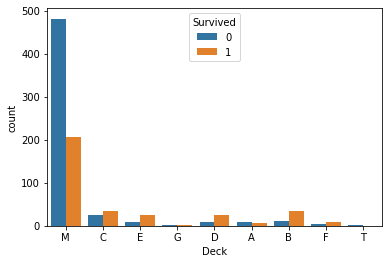

In [35]:
sns.countplot(data = train, x = 'Deck', hue = 'Survived')

- M에서 상대적으로 사람이 많이 죽었구나
- M이라는 값이 생존여부 판단하는 것에 의미가 있지 않을까?

#### Pclass 시각화

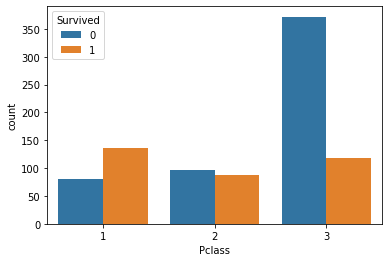

In [36]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

- 3등급은 사망자가 월등히 많다

#### Deck과 Pclass 시각화

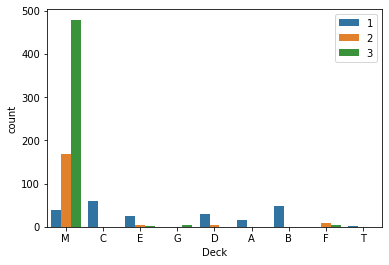

In [37]:
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.legend(loc = 'upper right') #범례 오른쪽 위에 나오게 함

#### Sex, Embarked 시각화해보기

In [38]:
# 성별에 따른 생존/사망 수치 시각화

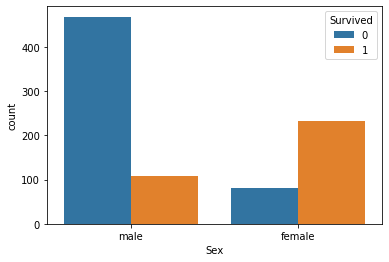

In [39]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

- 남성일때는 사망자 비율이 높다
- 여성일때는 생존자 비율이 높다

In [40]:
# 승선항에 따른 생존/사망 수치 시각화

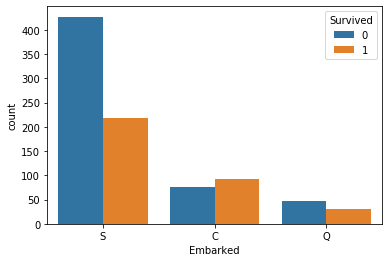

In [41]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

- S에서는 사망비율이 높다
- C에서는 생존비율이 좀 더 높다
- Q에서는 사망비율이 좀 더 높다

#### 수치형 데이터

#### Age 시각화
- 성별별 나이에 따른 사망/생존 분포 확인하기

##### violinplot => boxplot + 데이터의 분포를 확인해 볼 수 있는 kde(kernel desnity estimation)

(0, 80)

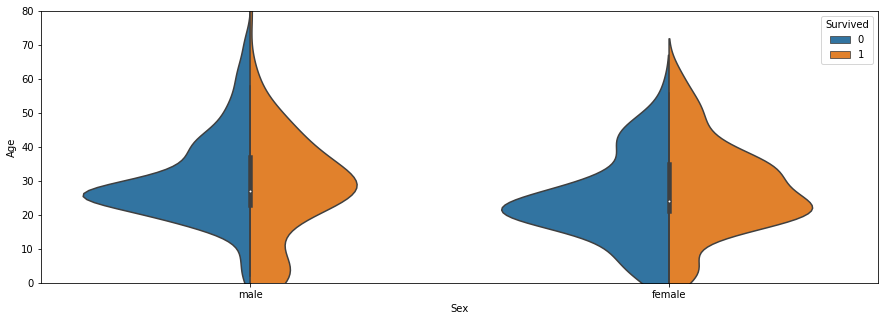

In [42]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)
plt.ylim(0,80) #y축 0~80까지만 보겠다

- 20~40대 사이가 대체적으로 분포가 넓게 나타남 -> 그 사이의 사망자가 좀 많음
- 남자 어린아이의 경우 생존 분포가 더 넓게 나타남 -> 남자아이가 좀 더 많이 살아남음

#### Fare 시각화
- 성별별 요금에 따른 사망/생존 분포 확인
- 요금은 1등칸->30파운드(375만원), 2등칸->13파운드(165만원), 3등칸->8파운드(100만원)

In [43]:
train['Fare'].describe() #통계 확인   #Fare요금 인덱싱하여 Series로 단순통계확인함

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(0, 300)

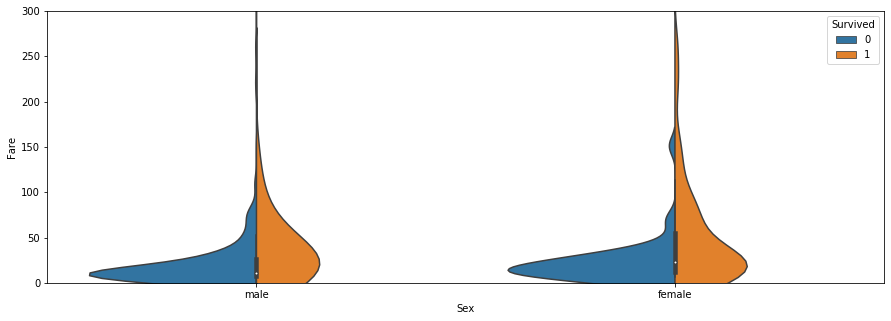

In [44]:
# X축에 Sex, y축에 Fare, hue Survived
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
               x = 'Sex',
               y = 'Fare',
               hue = 'Survived',
               split = True)
plt.ylim(0, 300)

- 요금값이 낮을수록 사망자 비율이 높다

In [45]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1        #새로운 특성 만들어줌 #+1은 numpy의 broadCasting 개념

In [46]:
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

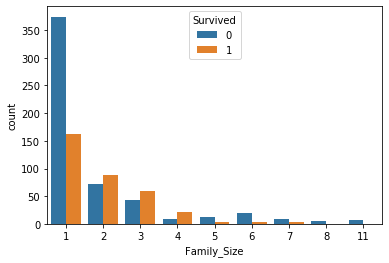

In [47]:
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')

- 가족수가 1일때 사망비율이 높고, 2 ~ 4 생존비율이 높고, 5~ 사망비율이 높다.

In [48]:
# 숫자형 -> 범주형 : binning(사소한 관찰의 오류를 줄여 줄 수 있다.)

In [49]:
# cut
bins = [0,1,4,11]
labels = ['Alone','Small','Large']
train['Family_Group'] = pd.cut(train['Family_Size'], bins = bins, labels = labels)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family_Size   891 non-null    int64   
 12  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 131.5+ KB


In [51]:
test['Family_Group'] = pd.cut(test['Family_Size'], bins = bins, labels = labels)

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Embarked      418 non-null    object  
 9   Deck          418 non-null    object  
 10  Family_Size   418 non-null    int64   
 11  Family_Group  418 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 39.7+ KB


### Text 데이터 다루기
- Name 시각화
- 중간 호칭만 추출

In [53]:
#s = '안녕하세요, 저는 손지영입니다. 머신러닝수업하고있어요'
#s

In [54]:
#s.split(',')[1].split('.')[1]

In [55]:
#1번째 행에 있는 MR라는 문자열 추출
train.loc[1, 'Name']   #1인 이유는 0에 PassengerId 있기때문!

'Braund, Mr. Owen Harris'

In [56]:
train.loc[1, 'Name'].split(',')[1].split('.')[0].strip()   #앞,뒤의 공백을 제거해주는 strip()

'Mr'

# 2020.08.24

In [57]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [58]:
def split_title(row): 
    # ','로 잘라낸 2번째 값을 다시 '.'을 기준으로 잘라내고, 잘라낸 결과값의 첫번째 값을 공백을 제거하고 반환하라.
    return row.split(',')[1].split('.')[0].strip()

In [59]:
train['Initial'] = train['Name'].apply(split_title)
test['Initial'] = test['Name'].apply(split_title)
# a = train['Name']
# apply(split_title(a)) 같은 개념인데 여기서는 이렇게 안씀

In [60]:
###X_train

In [61]:
train.drop('Name', axis = 1, inplace = True) #원본데이터 변경해주세요~~ == inplace = True
test.drop('Name', axis = 1, inplace = True)

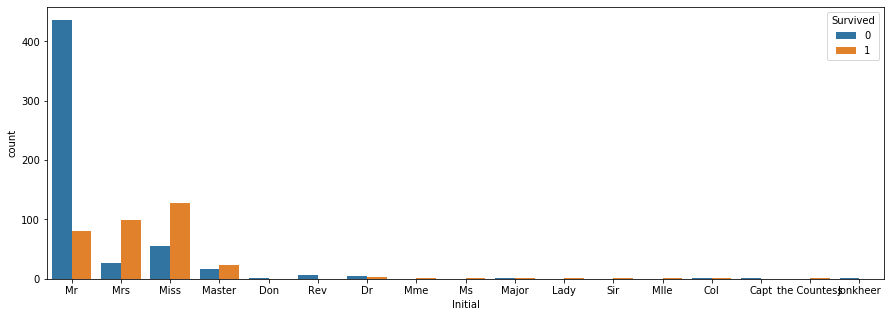

In [62]:
# 시각화

plt.figure(figsize = (15,5))
sns.countplot(data = train, x = 'Initial', hue = 'Survived')

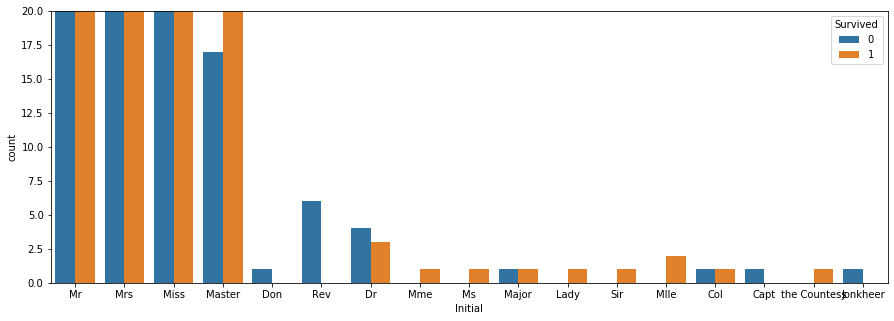

In [63]:
plt.figure(figsize = (15,5))
plt.ylim(0,20)
sns.countplot(data = train, x = 'Initial', hue = 'Survived')

#### Master: 결혼하지 않은 남성, 주로 청소년 이하

#### Rev: 목사님(6명 모두 사망)

In [64]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [65]:
train['Initial'].replace(['Mlle','Mme' ,'Ms',  'Dr', 'Major','Lady','the Countess','Jonkheer','Col',  'Rev',  'Capt','Sir','Don','Dona'],
                         ['Miss','Miss','Miss','Mrs','Mr',   'Mrs', 'Mrs',        'Other',    'Other','Other','Mr',  'Mr',  'Mr', 'Miss'], inplace = True)
test['Initial'].replace(['Mlle','Mme' ,'Ms',  'Dr', 'Major','Lady','the Countess','Jonkheer','Col',  'Rev',  'Capt','Sir','Don','Dona'],
                         ['Miss','Miss','Miss','Mrs','Mr',   'Mrs', 'Mrs',        'Other',    'Other','Other','Mr',  'Mr',  'Mr', 'Miss'], inplace = True)

In [66]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

### 티켓

In [67]:
train.drop('Ticket', axis = 1, inplace = True) #티켓정보 필요없으니 날리기!
test.drop('Ticket', axis = 1, inplace = True)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Initial       891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 124.5+ KB


In [69]:
 test['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [70]:
train['Family_Group'] =  train['Family_Group'].astype("object")

#연관관계 분석을 위해 문자를 "수치형 데이터"로 변환 (문자열 데이터로 어떠한 계산도 할 수 없기 때문!!)
train['Sex'] = train['Sex'].map({'male':0, 'female':1})     #map[변환전, 변환후]
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

train['Embarked'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2})
test['Embarked'] = test['Embarked'].map({'C':0, 'Q':1, 'S':2})

train['Deck'] = train['Deck'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'M':7, 'T':8})
test['Deck'] = test['Deck'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'M':7, 'T':8})

train['Family_Group'] = train['Family_Group'].map({'Alone':0, 'Small':1, 'Large':2})
test['Family_Group'] = test['Family_Group'].map({'Alone':0, 'Small':1, 'Large':2})

train['Initial'] = train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2,'Mrs':3, 'Other':4})
test['Initial'] = test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [71]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Size,Family_Group,Initial
PassengerId,,,,,,,,,,,,
1,0,3,0,22,1,0,7.2500,2,7,2,1,2
2,1,1,1,38,1,0,71.2833,0,2,2,1,3
3,1,3,1,26,0,0,7.9250,2,7,1,0,1
4,1,1,1,35,1,0,53.1000,2,2,2,1,3
5,0,3,0,35,0,0,8.0500,2,7,1,0,2


### 상관관계 분석

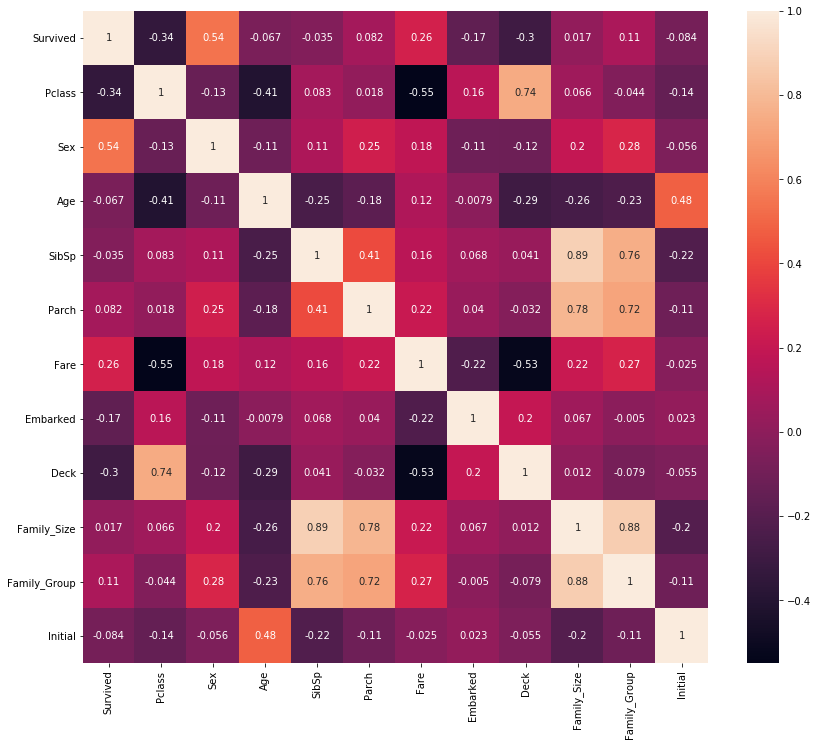

In [72]:
plt.figure(figsize = (14,12))
sns.heatmap(train.corr(), annot = True )

### 특성 선택

>- 범주형 데이터 인코딩
>- 전체 데이터를 이용해서 학습
>- 상관계수, Decision Tree 중요도를 활용해서 특성 고르기

In [73]:
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)

X_test = test

In [74]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'Family_Size', 'Family_Group', 'Initial'],
      dtype='object')

In [75]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Size,Family_Group,Initial
PassengerId,,,,,,,,,,,
1,3,0,22,1,0,7.2500,2,7,2,1,2
2,1,1,38,1,0,71.2833,0,2,2,1,3
3,3,1,26,0,0,7.9250,2,7,1,0,1
4,1,1,35,1,0,53.1000,2,2,2,1,3
5,3,0,35,0,0,8.0500,2,7,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
887,2,0,27,0,0,13.0000,2,7,1,0,4
888,1,1,19,0,0,30.0000,2,1,1,0,1
889,3,1,21,1,2,23.4500,2,7,4,1,1


In [76]:
X_train['Initial'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [77]:
X_train['Initial'] =  X_train['Initial'].astype('int32')

In [78]:
cat_feature = ['Pclass','Embarked','Deck','Family_Group','Initial']

In [79]:
#훈련데이터 One-hot Encoding

for cat_name in cat_feature:
    dummy = pd.get_dummies(X_train[cat_name], prefix = cat_name)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(cat_name, axis = 1, inplace = True)

In [80]:
#검증데이터 One-hot Encoding

for cat_name in cat_feature:
    dummy = pd.get_dummies(X_test[cat_name], prefix = cat_name)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(cat_name, axis = 1, inplace = True)

In [81]:
X_train.shape

(891, 29)

In [82]:
X_test.shape  #Deck가 7개

(418, 28)

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             891 non-null    int64  
 1   Age             891 non-null    int64  
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Family_Size     891 non-null    int64  
 6   Pclass_1        891 non-null    uint8  
 7   Pclass_2        891 non-null    uint8  
 8   Pclass_3        891 non-null    uint8  
 9   Embarked_0      891 non-null    uint8  
 10  Embarked_1      891 non-null    uint8  
 11  Embarked_2      891 non-null    uint8  
 12  Deck_0          891 non-null    uint8  
 13  Deck_1          891 non-null    uint8  
 14  Deck_2          891 non-null    uint8  
 15  Deck_3          891 non-null    uint8  
 16  Deck_4          891 non-null    uint8  
 17  Deck_5          891 non-null    uin

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             418 non-null    int64  
 1   Age             418 non-null    int64  
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Family_Size     418 non-null    int64  
 6   Pclass_1        418 non-null    uint8  
 7   Pclass_2        418 non-null    uint8  
 8   Pclass_3        418 non-null    uint8  
 9   Embarked_0      418 non-null    uint8  
 10  Embarked_1      418 non-null    uint8  
 11  Embarked_2      418 non-null    uint8  
 12  Deck_0          418 non-null    uint8  
 13  Deck_1          418 non-null    uint8  
 14  Deck_2          418 non-null    uint8  
 15  Deck_3          418 non-null    uint8  
 16  Deck_4          418 non-null    uint8  
 17  Deck_5          418 non-null    

In [85]:
set(X_train.columns) - set(X_test.columns) #train목록에서 test목록을 빼줘서 없는 컬럼을 확인

{'Deck_8'}

In [86]:
X_test['Deck_8'] = 0

In [87]:
X_test.shape

(418, 29)

## 4.모델 선택 및 학습

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
from sklearn.model_selection import cross_val_score

### KNN 모델

In [90]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [91]:
result = cross_val_score(knn_model,   #교차검증 수행시 이용할 객체
                        X_train,      #훈련데이터
                        y_train,      #정답데이터
                        cv = 5)  #X_train을 5단계로 나눠서 바꿔가면서 수행해라

In [92]:
result.mean()

0.7306509321448749

In [93]:
result

array([0.72067039, 0.68539326, 0.74719101, 0.76966292, 0.73033708])

# 2020-08-25

## Tree 모델 사용

In [94]:
tree_model = DecisionTreeClassifier(max_depth = 5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
#pip install graphviz
#graphviz압출풀고 설치 (Install Options에서 Add Graphviz to the system PATH for current user 체크)
# cmd -> 관리자권한 실행 -> cd C:\Program Files\Graphviz\bin -> ##  dir/w 로 확인 ## -> dot -c

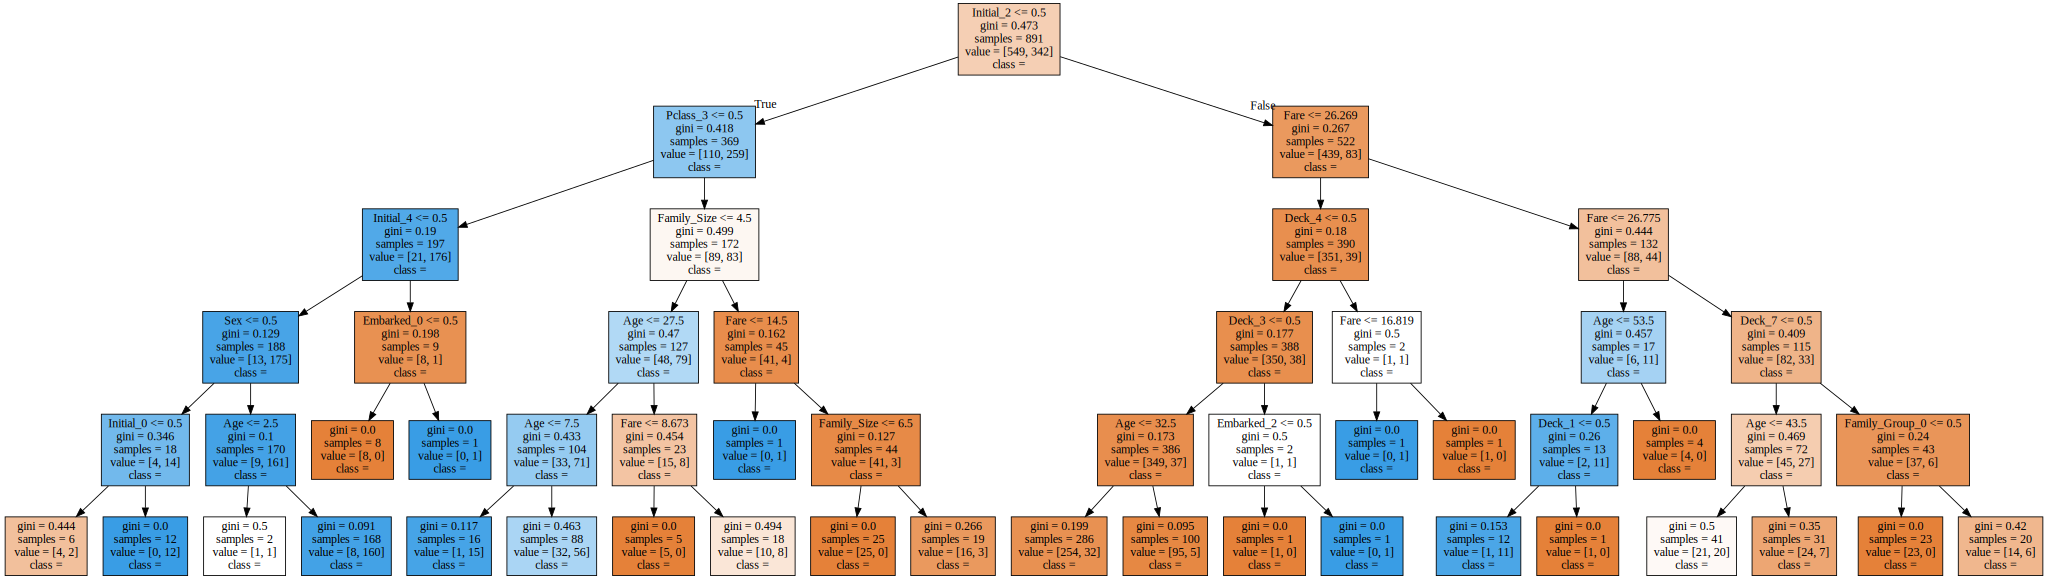

In [96]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_model, out_file = 'tree.dot', class_names = ['사망','생존'],
               feature_names = X_train.columns, impurity=True, filled=True)           #그래프 그리는 옵션들

with open('tree.dot', encoding = 'UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    

In [97]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 5)

In [98]:
result

array([0.79329609, 0.80337079, 0.8258427 , 0.79775281, 0.87078652])

In [99]:
result.mean()

0.8182097796748478